In [1]:
!pip install imbalanced-learn



In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [12]:
from google.colab import files
uploaded = files.upload()


Saving Creditcard_data.csv to Creditcard_data (1).csv


In [13]:
data = pd.read_csv("Creditcard_data.csv")
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
data['Class'].value_counts()


,count
Class,
0,763
1,9


In [15]:
X = data.drop('Class', axis=1)
y = data['Class']

ros = RandomOverSampler(random_state=42)
X_balanced, y_balanced = ros.fit_resample(X, y)

balanced_data = pd.concat([X_balanced, y_balanced], axis=1)
balanced_data['Class'].value_counts()


,count
Class,
0,763
1,763


In [16]:
samples = []

for i in range(5):
    sample = balanced_data.sample(frac=0.6, random_state=i)
    samples.append(sample)


In [17]:
def apply_sampling(X, y, method):
    if method == 1:
        return RandomOverSampler().fit_resample(X, y)
    elif method == 2:
        return RandomUnderSampler().fit_resample(X, y)
    elif method == 3:
        return SMOTE().fit_resample(X, y)
    elif method == 4:  # Stratified Sampling
        return X, y
    elif method == 5:  # Simple Random Sampling
        return X, y


In [18]:
models = [
    LogisticRegression(max_iter=500),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC()
]

model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "KNN", "SVM"]


In [19]:
results = np.zeros((5,5))

for i, model in enumerate(models):
    for j in range(5):
        sample = samples[j]
        X_sample = sample.drop('Class', axis=1)
        y_sample = sample['Class']

        X_res, y_res = apply_sampling(X_sample, y_sample, j+1)

        if j+1 == 4:
            X_train, X_test, y_train, y_test = train_test_split(
                X_res, y_res, test_size=0.3, stratify=y_res, random_state=42)
        else:
            X_train, X_test, y_train, y_test = train_test_split(
                X_res, y_res, test_size=0.3, random_state=42)

        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        acc = accuracy_score(y_test, preds)
        results[i][j] = acc * 100


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [20]:
sampling_labels = [
    "Random Oversampling",
    "Random Undersampling",
    "SMOTE",
    "Stratified Sampling",
    "Simple Random Sampling"
]

results_df = pd.DataFrame(results,
                          columns=sampling_labels,
                          index=model_names)

results_df


,Random Oversampling,Random Undersampling,SMOTE,Stratified Sampling,Simple Random Sampling
Logistic Regression,93.548387,93.750000,92.028986,92.727273,92.363636
Decision Tree,99.641577,98.161765,98.188406,99.272727,99.272727
Random Forest,100.000000,100.000000,100.000000,100.000000,99.636364
KNN,96.774194,98.161765,96.739130,96.000000,97.454545
SVM,67.025090,62.867647,68.840580,66.545455,68.363636


In [21]:
best_sampling = results_df.idxmax(axis=1)
best_sampling


,0
Logistic Regression,Random Undersampling
Decision Tree,Random Oversampling
Random Forest,Random Oversampling
KNN,Random Undersampling
SVM,SMOTE


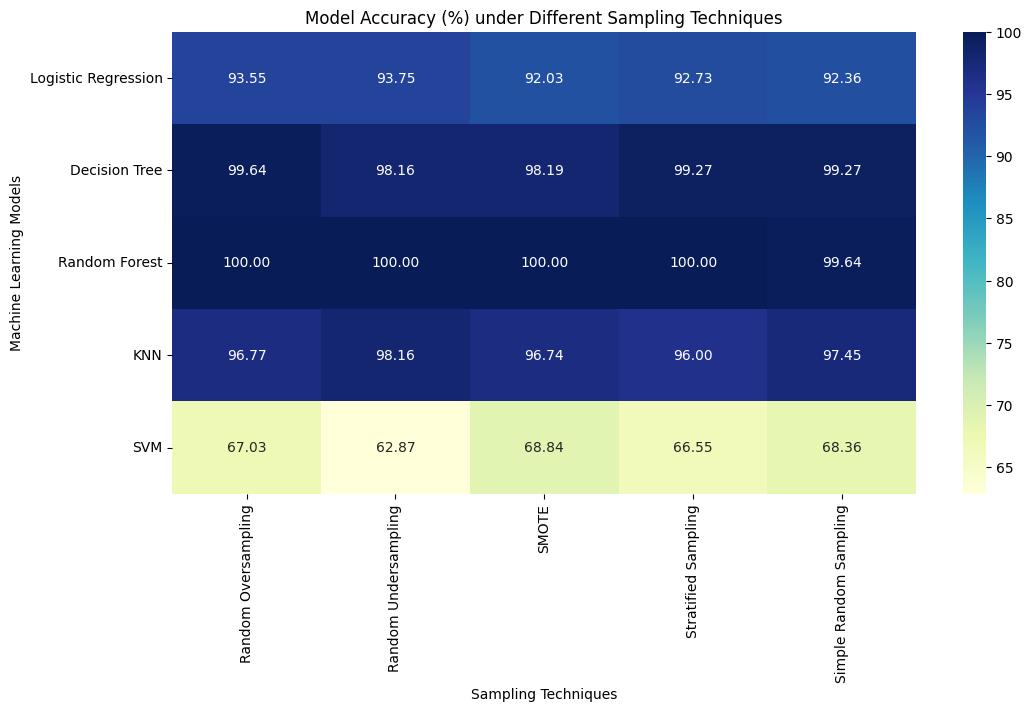

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(results_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Model Accuracy (%) under Different Sampling Techniques")
plt.ylabel("Machine Learning Models")
plt.xlabel("Sampling Techniques")
plt.show()


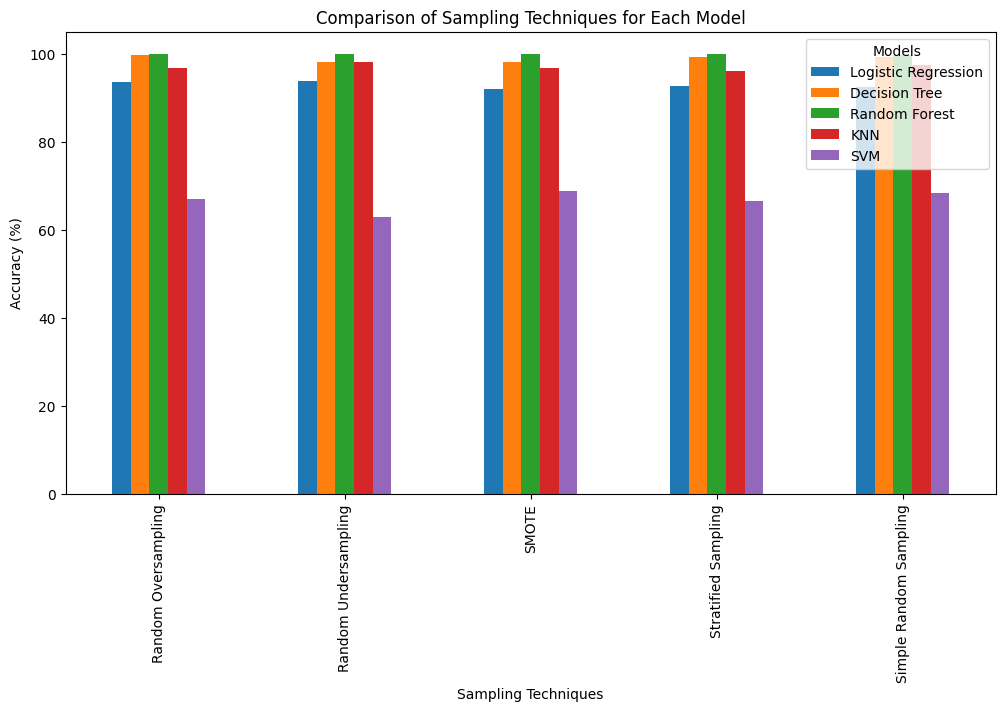

In [23]:
results_df.T.plot(kind='bar', figsize=(12,6))
plt.title("Comparison of Sampling Techniques for Each Model")
plt.ylabel("Accuracy (%)")
plt.xlabel("Sampling Techniques")
plt.legend(title="Models")
plt.show()
